In [1]:
from qiskit.circuit.random import random_circuit

from circuit_knitting.cutting.gate_and_wire_cutting.frontend import cut_wires_and_gates_to_subcircuits
from circuit_knitting.cutting.gate_and_wire_cutting.frontend import execute_simulation
from circuit_knitting.cutting.cutting_reconstruction import reconstruct_expectation_values
from circuit_knitting.cutting.gate_and_wire_cutting.frontend import exact_observables
from circuit_knitting.cutting.gate_and_wire_cutting.frontend import compare_results

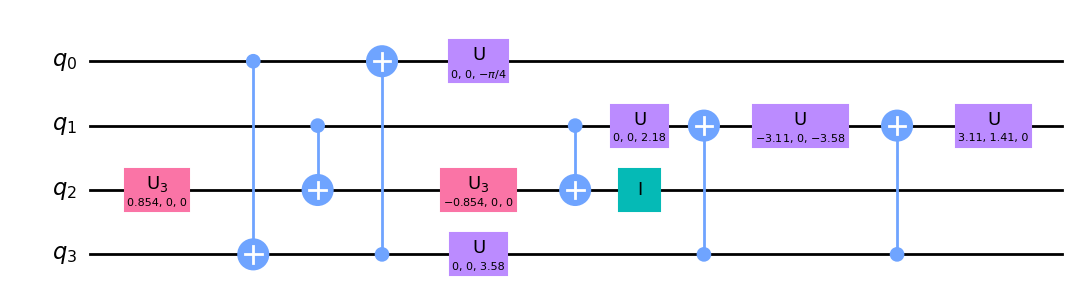

In [9]:
q = 4

circuit = random_circuit(q, 2, measure=False).decompose(reps=3)
circuit.draw('mpl')

In [10]:
observables = ['Z'*q]

If there is an error in the below cell, simply re-create the random circuit. An error suggests that not all qubits are entangled, and therefore do not even require cutting in the first place. 

In [11]:
subcircuits, subobservables, wire_cuts, gate_cuts = cut_wires_and_gates_to_subcircuits(
    circuit=circuit,
    observables=observables,
    method='automatic',
    max_subcircuit_width=2,
    max_cuts=4,
    num_subcircuits=[2],
    model='gurobi'
)

Restricted license - for non-production use only - expires 2025-11-24
Set parameter TimeLimit to value 300
Set parameter Cutoff to value 1e+100
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (linux64 - "Ubuntu 22.04.2 LTS")

CPU model: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 157 rows, 75 columns and 502 nonzeros
Model fingerprint: 0xecc6aad8
Variable types: 0 continuous, 75 integer (60 binary)
Coefficient statistics:
  Matrix range     [1e-02, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+01]
  RHS range        [1e+00, 2e+00]
Presolve removed 157 rows and 75 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 16 available processors)

Solution count 1: 2 

Optimal solution found (tolerance 1.00e-04)
Be

In [12]:
gate_cuts

2

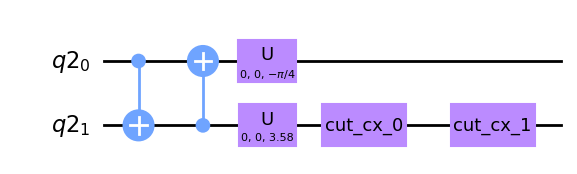

In [13]:
subcircuits[0].draw('mpl')

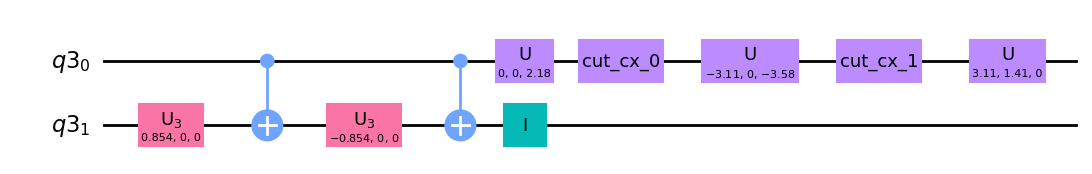

In [14]:
subcircuits[1].draw('mpl')

In [17]:
# Execute the subcircuits
quasi_dists, coefficients = execute_simulation(subcircuits, subobservables)

simulation_expvals = reconstruct_expectation_values(quasi_dists, coefficients, subobservables)
simulation_expvals

[0.01318359375]

In [18]:
# Create ideal results
ideal_expvals = exact_observables(circuit, observables)
ideal_expvals

array([1.66533454e-16])

In [19]:
# Compare the error between results
a, b = compare_results(simulation_expvals, ideal_expvals)

Simulated expectation values: [0.01318359]
Exact expectation values: [0.0]
Errors in estimation: [0.01318359]
Relative errors in estimation: [79164837199871.0]


In [20]:
a, b

([0.01318359], [79164837199871.0])